# Random forest, neural networks, final

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Still titanic data:

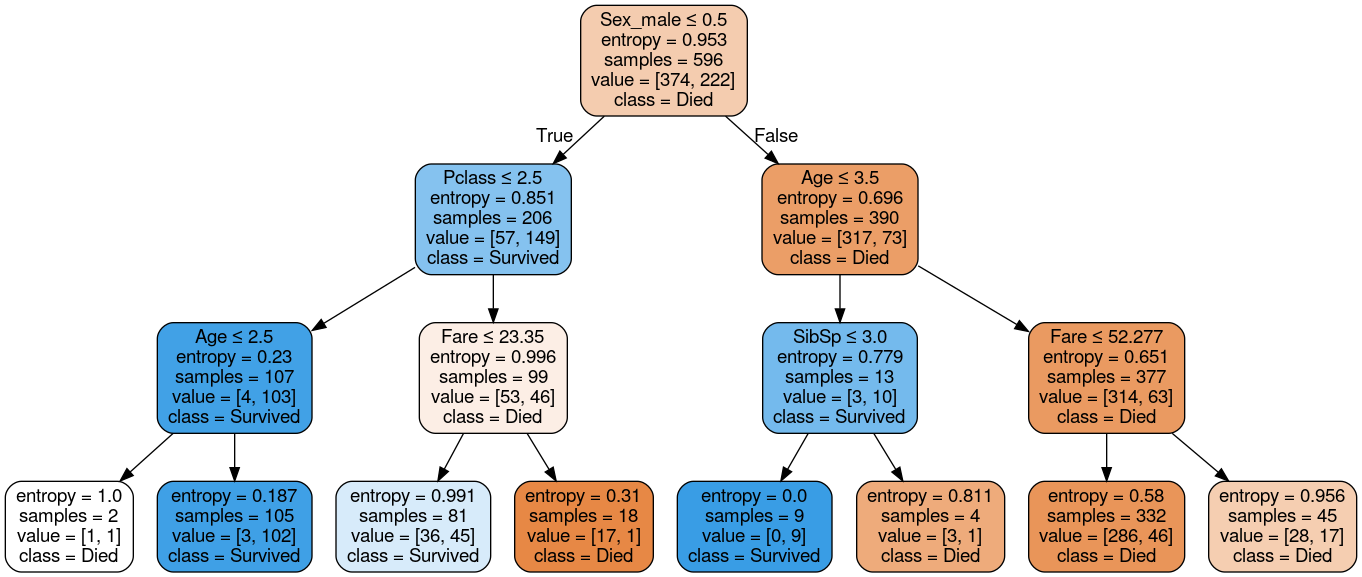

In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from IPython.display import Image
import pydotplus

titanic_data = pd.read_csv('train.csv')
x = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
x = pd.get_dummies(x)
x = x.fillna({'Age': x.Age.median()})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(x_train, y_train)

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(x),
                     class_names = ['Died', 'Survived'],
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Using minimum samples split and leaf options: